### Regression analysis GDP and life expectancy

**Description:** Least Squares regression between GDP and Life-expectancy 2019<br>
**Dataset:** UNdata repositories<br>
**Author:** Jaume Manero

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.ticker as ticker
import re
import json
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_GDP = pd.read_csv('./data/GDP_countries_raw.csv')
df_life = pd.read_csv('./data/Life_expectancy_countries_raw.csv')
df_pop = pd.read_csv('./data/Population_2019.csv')

In [3]:
# streamline GDP file
df_GDP = df_GDP.rename(columns={'Value': 'GDP'})
df_GDP = df_GDP[df_GDP['Year']==2019]
df_GDP.drop(['Item', 'Year'],axis=1,inplace=True)
df_GDP.reset_index()

,index,Country or Area,GDP
0,1,Afghanistan,496.940553
1,52,Albania,5345.602513
2,103,Algeria,3975.519002
3,154,Andorra,40900.538590
4,205,Angola,2809.626403
...,...,...,...
207,10017,Venezuela (Bolivarian Republic of),5264.842747
208,10068,Viet Nam,2715.275874
209,10119,Yemen,865.726138
210,10193,Zambia,1305.060260


In [4]:
# streamline life_expectancy file
df_life = df_life.rename(columns={'Value': 'Life_Expectancy'})
df_life = df_life[df_life['Year(s)']=='2015-2020']
df_life.drop(['Variant', 'Year(s)'],axis=1,inplace=True)
df_life

,Country or Area,Life_Expectancy
16,Afghanistan,64.28
46,Africa,62.66
76,Albania,78.38
106,Algeria,76.59
136,American Samoa,NaN
...,...,...
8536,World,72.28
8566,World Bank income groups,NaN
8596,Yemen,66.03
8626,Zambia,63.26


In [5]:
# streamline population file
df_pop = df_pop[df_pop['Year(s)']==2019]
df_pop = df_pop[df_pop['Variant']=='Medium']
df_pop.drop(['Variant', 'Year(s)'],axis=1,inplace=True)
df_pop = df_pop.rename(columns={'Value': 'Population'})

In [6]:
# merge dataframes
df_merged = pd.merge(df_GDP, df_life, how='left')
df_merged = pd.merge(df_merged, df_pop, how='left')
df_merged = df_merged.dropna()

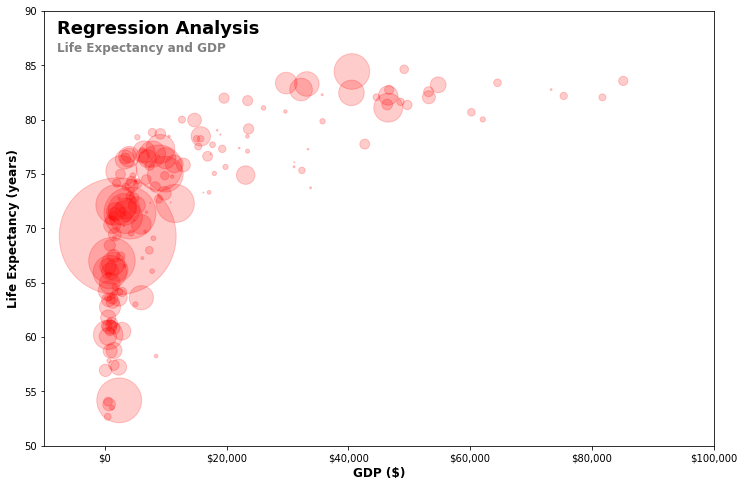

In [7]:
# figure standard scale
fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.set_xlabel("GDP ($)",fontsize=12, fontweight='bold')
ax.set_ylabel("Life Expectancy (years)",color="black",fontsize=12, fontweight='bold')

tics = df_merged['GDP'].values.tolist()

v_size = df_merged['Population']/100

ax.set_ylim([50,90])
ax.set_xlim([-10000,100000])
fmt = lambda x, pos: '${:,.0f}'.format((x), pos)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(fmt))

ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))

ax.scatter(df_merged['GDP'], df_merged['Life_Expectancy'], s=v_size, alpha=0.2,
          c = 'red')
#           c = [color_scale[r] for r in df[grouping]], ..
                                                                        


plt.figtext(0.14, 0.84, "Regression Analysis", fontsize=18, fontweight='bold')
plt.figtext(0.14, 0.81, "Life Expectancy and GDP", fontsize=12, color='grey',fontweight='bold')

plt.savefig('Regression.jpg')
plt.show()

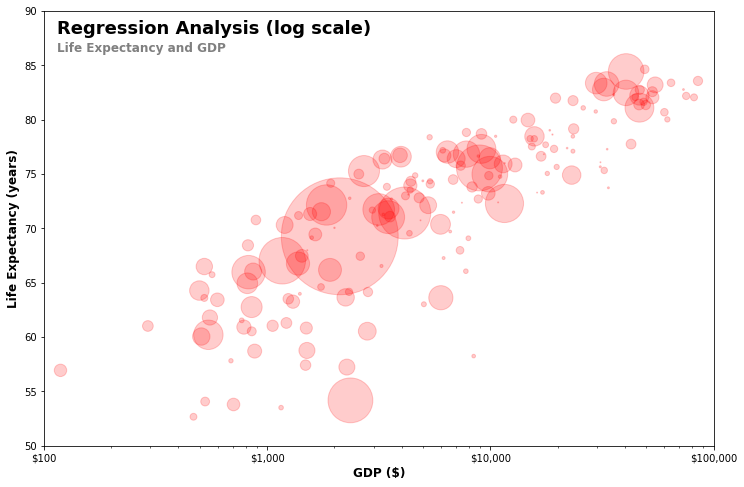

In [8]:
# figure log scale
fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.set_xlabel("GDP ($)",fontsize=12, fontweight='bold')
ax.set_ylabel("Life Expectancy (years)",color="black",fontsize=12, fontweight='bold')

tics = df_merged['GDP'].values.tolist()

v_size = df_merged['Population']/100
ax.set_ylim([50,90])
ax.set_xlim([100,100000])

ax.set_xscale('log')
fmt = lambda x, pos: '${:,.0f}'.format((x), pos)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(fmt))

ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))

ax.scatter(df_merged['GDP'], df_merged['Life_Expectancy'], s=v_size, alpha=0.2,
          c = 'red')
                                                                     
plt.figtext(0.14, 0.84, "Regression Analysis (log scale)", fontsize=18, fontweight='bold')
plt.figtext(0.14, 0.81, "Life Expectancy and GDP", fontsize=12, color='grey',fontweight='bold')

plt.savefig('Regression_log.jpg')
plt.show()

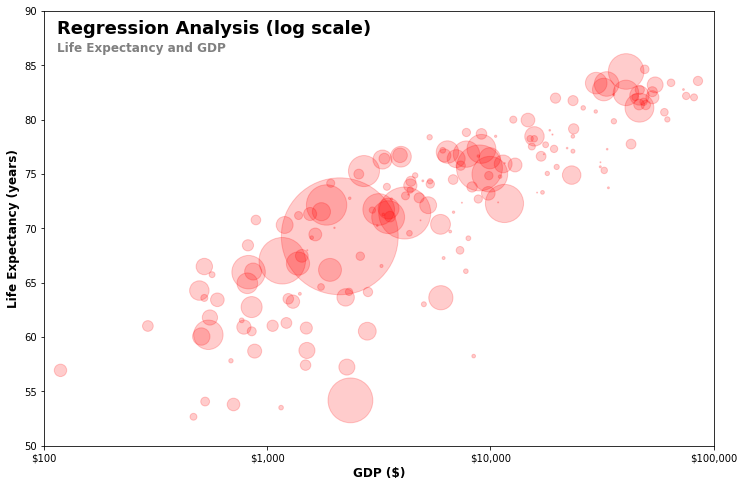

In [9]:
# figure log scale by transformation of data
df_merged['log'] = np.log10(df_merged['GDP'])

fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.set_xlabel("GDP ($)",fontsize=12, fontweight='bold')
ax.set_ylabel("Life Expectancy (years)",color="black",fontsize=12, fontweight='bold')

tics = df_merged['GDP'].values.tolist()

v_size = df_merged['Population']/100

#plt.xticks(range(0, len(tics) ))
#ax.tick_params(axis='both', which='major', labelsize=fontsize)
#ax.set_xticklabels(tics, rotation = 90)

#fmt = lambda x,pos:'{:.0f}'.format(x/1000000, pos)

#fmt = lambda x, pos: '{:.2f}'.format((x)/1000000, pos)
#ax.set_xscale('log')
fmt = lambda x, pos: '${:,.0f}'.format((10 ** x), pos)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(fmt))

ax.set_ylim([50,90])
ax.set_xlim([2,5])

xmin, xmax = ax.get_xlim()
ax.set_xticks(np.round(np.linspace(xmin, xmax, 4), 2))

ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))

ax.scatter(df_merged['log'], df_merged['Life_Expectancy'], s=v_size, alpha=0.2,
          c = 'red')
#           c = [color_scale[r] for r in df[grouping]], ..
                                                                        


plt.figtext(0.14, 0.84, "Regression Analysis (log scale)", fontsize=18, fontweight='bold')
plt.figtext(0.14, 0.81, "Life Expectancy and GDP", fontsize=12, color='grey',fontweight='bold')

plt.savefig('Regression_log1.jpg')
plt.show()

In [10]:
# regression line
x = df_merged['log'].values
y = df_merged['Life_Expectancy'].values
x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)
model = LinearRegression().fit(x,y)

x_line = np.linspace(5, 100000, 100)
x_line = np.log10(x_line)
x_line = x_line.reshape(len(x_line), 1)

x_line
line_y = model.predict(x_line)


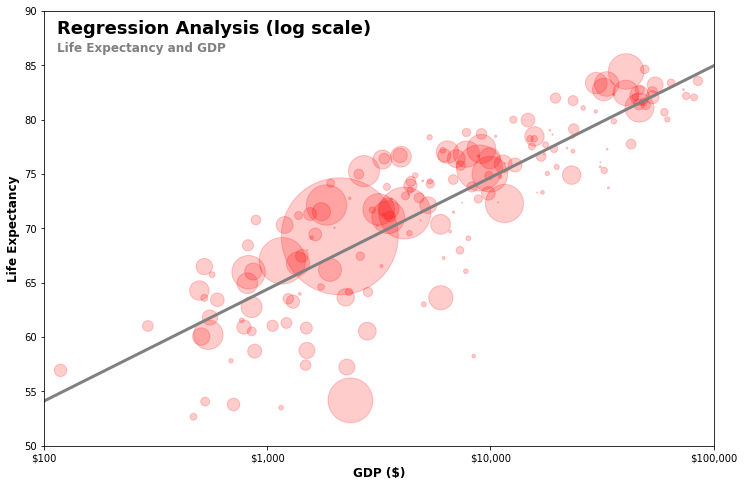

In [11]:
# figure log scale
fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.set_xlabel("GDP ($)",fontsize=12, fontweight='bold')
ax.set_ylabel("Life Expectancy",color="black",fontsize=12, fontweight='bold')

tics = df_merged['GDP'].values.tolist()

v_size = df_merged['Population']/100

fmt = lambda x, pos: '${:,.0f}'.format((10 ** x), pos)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(fmt))

ax.set_ylim([50,90])
ax.set_xlim([2,5])

xmin, xmax = ax.get_xlim()
ax.set_xticks(np.round(np.linspace(xmin, xmax, 4), 2))

ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))

ax.scatter(df_merged['log'], df_merged['Life_Expectancy'], s=v_size, alpha=0.2,
          c = 'red')
ax.plot(x_line,line_y, color="grey", linewidth=3)
plt.figtext(0.14, 0.84, "Regression Analysis (log scale)", fontsize=18, fontweight='bold')
plt.figtext(0.14, 0.81, "Life Expectancy and GDP", fontsize=12, color='grey',fontweight='bold')

plt.savefig('Regression_log_line.jpg')
plt.show()